# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

# <div style='padding:7px;background-color:Maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>CLassification Modeling<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

from sklearn import svm

import pickle



## <span style="color:Aqua;">Reading model dataset:</span>

In [2]:
df = pd.read_feather('clustered.feather')

In [3]:
df.sample(3)

num_bank_accounts  num_credit_card  num_of_loan  delay_from_due_date  \
30083                  9                5            7                   39   
51153                  4                5            5                    9   
28035                  6                5            5                   19   

       num_of_delayed_payment  num_credit_inquiries  credit_mix  \
30083                      16                7.0000           0   
51153                      12                5.0000           1   
28035                      12               11.0000           1   

       payment_of_min_amount  credit_score  credit_inquiry_per_loan  \
30083                      2             0                   1.0000   
51153                      2             1                   1.0000   
28035                      2             0                   2.0000   

       age_group  disposable_income  age_boxcox  annual_income_boxcox  \
30083          2          4741.4404      9.7207               14.5533   
51153          1          7831.4062      9.4626               15.4211   
28035          3          1344.5226     12.7638               12.7655   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
30083                       12.4418                9.1806   
51153                       13.5066                6.5114   
28035                       10.0306                7.6253   

       outstanding_debt_square  credit_utilization_ratio_log  \
30083                  51.2419                        3.3673   
51153                   5.6365                        3.0910   
28035                  40.5212                        3.6636   

       credit_history_age_boxcox  changed_credit_limit_cube  \
30083                    67.4383                         47   
51153                    69.6281                       -104   
28035                    56.3251                        -53   

       total_emi_per_month_square  amount_invested_monthly_boxcox  \
30083                     13.2291                          8.7693   
51153                     18.3732                         12.1119   
28035                      9.0541                          6.8308   

       monthly_balance_boxcox  credit_limit_change_rate_exp  \
30083                 20.6413                        0.6713   
51153                 11.4498                        0.7196   
28035                 18.8244                        0.7327   

       debt_income_ratio_log  loan_income_ratio_month_boxcox  \
30083                 8.3935                          1.8023   
51153                 9.0586                          1.7645   
28035                 7.4940                          1.6677   

       credit_utilization_per_account_boxcox  reliable_payment_boxcox  \
30083                                 0.7298                   3.6114   
51153                                 0.8887                   3.0607   
28035                                 0.9587                   3.4632   

       delayed_payment_ratio_boxcox  investment_to_income_ratio_square  \
30083                        0.7704                             0.1137   
51153                        0.7704                             0.1294   
28035                        0.7704                             0.1602   

       total_credit_exposure_boxcox  \
30083                       33.6750   
51153                        7.8419   
28035                       28.8199   

       credit_utilization_to_income_ratio_boxcox  savings_rate_rec  \
30083                                   -10.3290           77.3303   
51153                                   -11.7645           59.7235   
28035                                    -8.0020           38.9186   

       income_stability_boxcox  total_liability_boxcox  debt_paytime_log  \
30083                   0.0272                 34.3076            2.7026   
51153                   0.0372                 16.8511           -1.0786   
28035                  -0.1339               

In [4]:
continuous_columns = [
      'disposable_income', 'age_boxcox', 
    'annual_income_boxcox', 'monthly_inhand_salary_boxcox', 'interest_rate_boxcox', 
    'outstanding_debt_square', 'credit_utilization_ratio_log', 'credit_history_age_boxcox', 
    'total_emi_per_month_square', 'amount_invested_monthly_boxcox', 'monthly_balance_boxcox', 
    'credit_limit_change_rate_exp', 'debt_income_ratio_log', 'loan_income_ratio_month_boxcox', 
    'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox', 
    'investment_to_income_ratio_square', 'total_credit_exposure_boxcox', 
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec', 'income_stability_boxcox', 
    'total_liability_boxcox', 'debt_paytime_log','changed_credit_limit_cube'
]

Ordinal_columns = [
    'num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date', 'num_credit_inquiries',
    'num_of_delayed_payment', 'credit_mix', 'payment_of_min_amount', 
      'age_group', 'Cluster' ,'credit_inquiry_per_loan','High_Spent_Large_Value_Payments', 'High_Spent_Medium_Value_Payments',
       'High_Spent_Small_Value_Payments', 'Low_Spent_Large_Value_Payments',
       'Low_Spent_Medium_Value_Payments', 'Low_Spent_Small_Value_Payments'
]

print(len(continuous_columns) + len(Ordinal_columns))

42


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   num_bank_accounts                          100000 non-null  int8   
 1   num_credit_card                            100000 non-null  int8   
 2   num_of_loan                                100000 non-null  int8   
 3   delay_from_due_date                        100000 non-null  int8   
 4   num_of_delayed_payment                     100000 non-null  int8   
 5   num_credit_inquiries                       100000 non-null  float64
 6   credit_mix                                 100000 non-null  int8   
 7   payment_of_min_amount                      100000 non-null  int8   
 8   credit_score                               100000 non-null  int8   
 9   credit_inquiry_per_loan                    100000 non-null  float64
 10  age_group

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [6]:
df.drop_duplicates()

num_bank_accounts  num_credit_card  num_of_loan  delay_from_due_date  \
0                      3                4            4                    3   
1                      3                4            4                    3   
2                      3                4            4                    3   
3                      3                4            4                    5   
4                      3                4            4                    6   
...                  ...              ...          ...                  ...   
99995                  4                6            2                   23   
99996                  4                6            2                   18   
99997                  4                6            2                   27   
99998                  4                6            2                   20   
99999                  4                6            2                   18   

       num_of_delayed_payment  num_credit_inquiries  credit_mix  \
0                           7                4.0000           2   
1                           4                4.0000           2   
2                           7                4.0000           2   
3                           4                4.0000           2   
4                           4                4.0000           2   
...                       ...                   ...         ...   
99995                       7                3.0000           2   
99996                       7                3.0000           2   
99997                       6                3.0000           2   
99998                       6                3.0000           2   
99999                       6                3.0000           2   

       payment_of_min_amount  credit_score  credit_inquiry_per_loan  \
0                          0             2                   1.0000   
1                          0             2                   1.0000   
2                          0             2                   1.0000   
3                          0             2                   1.0000   
4                          0             2                   1.0000   
...                      ...           ...                      ...   
99995                      0             0                   1.0000   
99996                      0             0                   1.0000   
99997                      0             0                   1.0000   
99998                      0             1                   1.0000   
99999                      0             0                   1.0000   

       age_group  disposable_income  age_boxcox  annual_income_boxcox  \
0              1          1775.2684      8.9332               12.7104   
1              1          1775.2684      8.9332               12.7104   
2              1          1775.2684      8.9332               12.7104   
3              1          1775.2684      8.9332               12.7104   
4              1          1775.2684      8.9332               12.7104   
...          ...                ...         ...                   ...   
99995          1          3324.3118      9.4626               13.9204   
99996          1          3324.3118      9.4626               13.9204   
99997          1          3324.3118      9.4626               13.9204   
99998          1          3324.3118      9.4626               13.9204   
99999          1          3324.3118      9.4626               13.9204   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
0                           10.4906                1.4661   
1                           10.4906                1.4661   
2                           10.4906                1.4661   
3                           10.4906                1.4661   
4                           10.4906                1.4661   
...                             ...                   ...   
99995                       11.6726                3.2999   
99996                       11.6726

In [7]:
x = df.drop('credit_score',axis=1)
y = df[['credit_score']]

In [8]:
x.describe().T

count      mean       std  \
num_bank_accounts                         100000.0000    5.3688    2.5933   
num_credit_card                           100000.0000    5.5336    2.0671   
num_of_loan                               100000.0000    3.5329    2.4464   
delay_from_due_date                       100000.0000   21.0814   14.8046   
num_of_delayed_payment                    100000.0000   13.3131    6.2372   
num_credit_inquiries                      100000.0000    5.7983    3.8678   
credit_mix                                100000.0000    1.0662    0.7329   
payment_of_min_amount                     100000.0000    1.1666    0.9231   
credit_inquiry_per_loan                   100000.0000    1.8403    1.2931   
age_group                                 100000.0000    2.1350    1.0752   
disposable_income                         100000.0000 4089.5716 3132.9336   
age_boxcox                                100000.0000   11.3209    2.5192   
annual_income_boxcox                      100000.0000   13.8608    1.3315   
monthly_inhand_salary_boxcox              100000.0000   11.5786    1.5771   
interest_rate_boxcox                      100000.0000    5.2516    2.4293   
outstanding_debt_square                   100000.0000   34.6016   15.1312   
credit_utilization_ratio_log              100000.0000    3.4457    0.1644   
credit_history_age_boxcox                 100000.0000  124.3568   50.7896   
changed_credit_limit_cube                 100000.0000    5.5901   57.1509   
total_emi_per_month_square                100000.0000    8.7194    5.2116   
amount_invested_monthly_boxcox            100000.0000    7.6666    2.4276   
monthly_balance_boxcox                    100000.0000   21.2163    4.1742   
credit_limit_change_rate_exp              100000.0000    0.5315    0.1295   
debt_income_ratio_log                     100000.0000    8.3038    0.9835   
loan_income_ratio_month_boxcox            100000.0000    1.9035    0.2104   
credit_utilization_per_account_boxcox     100000.0000    0.9265    0.1398   
reliable_payment_boxcox                   100000.0000    2.2680    1.5732   
delayed_payment_ratio_boxcox              100000.0000    1.3640    1.0182   
investment_to_income_ratio_square         100000.0000    0.1207    0.0306   
total_credit_exposure_boxcox              100000.0000   25.2897    7.7162   
credit_utilization_to_income_ratio_boxcox 100000.0000   -9.4870    1.3536   
savings_rate_rec                          100000.0000   76.0148   34.1407   
income_stability_boxcox                   100000.0000   -0.0019    0.0780   
total_liability_boxcox                    100000.0000   25.9204    7.5244   
debt_paytime_log                          100000.0000    2.9474    1.7311   
High_Spent_Large_Value_Payments           100000.0000    0.1473    0.3544   
High_Spent_Medium_Value_Payments          100000.0000    0.1974    0.3980   
High_Spent_Small_Value_Payments           100000.0000    0.1176    0.3222   
Low_Spent_Large_Value_Payments            100000.0000    0.1076    0.3098   
Low_Spent_Medium_Value_Payments           100000.0000    0.1440    0.3511   
Low_Spent_Small_Value_Payments            100000.0000    0.2862    0.4520   
Cluster                                   100000.0000    0.7852    0.4107   

                                                min       25%       50%  \
num_bank_accounts                            0.0000    3.0000    5.0000   
num_credit_card                              0.0000    4.0000    5.0000   
num_of_loan                                  0.0000    2.0000    3.0000   
delay_from_due_date                          0.0000   10.0000   18.0000   
num_of_delayed_payment                       0.0000    9.0000   14.0000   
num_credit_inquiries                         0.0000    3.0000    5.0000   
credit_mix                                   0.0000    1.0000    1.0000   
payment_of_min_amount                        0.0000    0.0000    2.0000   
credit_inquiry_per_loan                      0.0000    1.0000

In [9]:
y.describe()

credit_score
count   100000.0000
mean         0.8883
std          0.6751
min          0.0000
25%          0.0000
50%          1.0000
75%          1.0000
max          2.0000

In [10]:
y.value_counts()

credit_score
1               53174
0               28998
2               17828
Name: count, dtype: int64

In [11]:
original_features=['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date','num_of_delayed_payment',
     'num_credit_inquiries', 'credit_mix','payment_of_min_amount',  'age_boxcox',
     'total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',]

all_features = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
    'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox','total_credit_exposure_boxcox',
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec','debt_paytime_log','interest_rate_boxcox',
    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',
             'income_stability_boxcox','total_liability_boxcox','investment_to_income_ratio_square',
             'outstanding_debt_square','credit_inquiry_per_loan','changed_credit_limit_cube']

revised_features = ['num_bank_accounts','num_credit_card','num_of_loan','num_of_delayed_payment', 'delay_from_due_date',
                    'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
                    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox',
                    'annual_income_boxcox','total_liability_boxcox','outstanding_debt_square','savings_rate_rec']

imp_fea = ['credit_mix','outstanding_debt_square','credit_utilization_ratio_log','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox','total_emi_per_month_square',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log','amount_invested_monthly_boxcox','savings_rate_rec',
    'income_stability_boxcox','age_boxcox','changed_credit_limit_cube']

new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','delay_from_due_date','credit_mix','num_of_delayed_payment','outstanding_debt_square',
           'credit_history_age_boxcox','monthly_balance_boxcox','High_Spent_Large_Value_Payments', 'High_Spent_Medium_Value_Payments',
       'High_Spent_Small_Value_Payments', 'Low_Spent_Large_Value_Payments',
       'Low_Spent_Medium_Value_Payments', 'Low_Spent_Small_Value_Payments']

## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [12]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [13]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(107031, 42) ---- (107031, 1)
(30000, 42) ---- (30000, 1)


In [14]:
x_test.sample(2)

num_bank_accounts  num_credit_card  num_of_loan  delay_from_due_date  \
62387                  7                3            1                   14   
43857                  8                6            5                   19   

       num_of_delayed_payment  num_credit_inquiries  credit_mix  \
62387                      22                3.0000           2   
43857                      11                6.0000           1   

       payment_of_min_amount  credit_inquiry_per_loan  age_group  \
62387                      0                   2.0000          2   
43857                      2                   1.0000          3   

       disposable_income  age_boxcox  annual_income_boxcox  \
62387          1570.8670      9.9746               12.5078   
43857          5015.0860     12.1049               14.6187   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
62387                       10.2228                4.6482   
43857                       12.5771                3.6669   

       outstanding_debt_square  credit_utilization_ratio_log  \
62387                  33.8129                        3.5835   
43857                  45.1073                        3.6636   

       credit_history_age_boxcox  changed_credit_limit_cube  \
62387                   203.5878                          0   
43857                    61.3618                        -24   

       total_emi_per_month_square  amount_invested_monthly_boxcox  \
62387                      3.3505                          7.7384   
43857                     15.3435                          7.9153   

       monthly_balance_boxcox  credit_limit_change_rate_exp  \
62387                 19.3558                        0.4613   
43857                 17.6941                        0.6322   

       debt_income_ratio_log  loan_income_ratio_month_boxcox  \
62387                 8.1240                          2.0860   
43857                 8.5115                          1.7421   

       credit_utilization_per_account_boxcox  reliable_payment_boxcox  \
62387                                 0.8959                   2.1168   
43857                                 0.8838                   3.1523   

       delayed_payment_ratio_boxcox  investment_to_income_ratio_square  \
62387                        3.5084                             0.1742   
43857                        0.6647                             0.0980   

       total_credit_exposure_boxcox  \
62387                       25.4983   
43857                       30.9657   

       credit_utilization_to_income_ratio_boxcox  savings_rate_rec  \
62387                                    -7.8754           32.9462   
43857                                    -9.8688          104.0061   

       income_stability_boxcox  total_liability_boxcox  debt_paytime_log  \
62387                   0.1254                 25.3219            4.5381   
43857                   0.0562                 31.9503            2.1525   

       High_Spent_Large_Value_Payments  High_Spent_Medium_Value_Payments  \
62387                                0                                 0   
43857                                0                                 0   

       High_Spent_Small_Value_Payments  Low_Spent_Large_Value_Payments  \
62387                                0                               0   
43857                                1                               0   

       Low_Spent_Medium_Value_Payments  Low_Spent_Small_Value_Payments  \
62387                                0                               1   
43857                                0                               0   

       Cluster  
62387        1  
43857        1

In [15]:
y_test.sample(2)

credit_score
10848             1
23644             0

## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train[continuous_columns])
x_test_scaled = scaler.transform(x_test[continuous_columns])

In [17]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

In [18]:
x_train_scaled_continuous = pd.DataFrame(x_train_scaled, columns=continuous_columns)
x_test_scaled_continuous = pd.DataFrame(x_test_scaled, columns=continuous_columns)

In [19]:
x_train_scaled_df = pd.concat([x_train_scaled_continuous.reset_index(drop=True), x_train[Ordinal_columns].reset_index(drop=True)], axis=1)
x_test_scaled_df = pd.concat([x_test_scaled_continuous.reset_index(drop=True), x_test[Ordinal_columns].reset_index(drop=True)], axis=1)

In [20]:
x_train_scaled_df

disposable_income  age_boxcox  annual_income_boxcox  \
0                  0.8432      0.2145                0.9431   
1                  0.5726      0.3496                0.8083   
2                  0.2725      0.6130                0.5419   
3                  0.4560      0.5449                0.7376   
4                  0.4875      0.7427                0.7409   
...                   ...         ...                   ...   
107026             0.4349      0.8451                0.7119   
107027             0.2635      0.8650                0.5467   
107028             0.2613      0.6579                0.5063   
107029             0.4200      0.2655                0.6908   
107030             0.6706      0.5678                0.8646   

        monthly_inhand_salary_boxcox  interest_rate_boxcox  \
0                             0.9492                0.4786   
1                             0.8222                0.4786   
2                             0.5901                0.2063   
3                             0.7561                0.9266   
4                             0.7751                0.3398   
...                              ...                   ...   
107026                        0.7400                0.2063   
107027                        0.5796                0.2992   
107028                        0.5747                0.1510   
107029                        0.7268                0.3216   
107030                        0.8793                0.0854   

        outstanding_debt_square  credit_utilization_ratio_log  \
0                        0.2627                        0.7005   
1                        0.4413                        0.7565   
2                        0.4663                        0.6107   
3                        0.5414                        0.5465   
4                        0.4283                        0.3275   
...                         ...                           ...   
107026                   0.2920                        0.5158   
107027                   0.2355                        0.4546   
107028                   0.5146                        0.6952   
107029                   0.2145                        0.6661   
107030                   0.4310                        0.2562   

        credit_history_age_boxcox  total_emi_per_month_square  \
0                          0.9016                      0.6741   
1                          0.9761                      0.0000   
2                          0.9717                      0.3891   
3                          0.2660                      0.5236   
4                          0.3333                      0.4325   
...                           ...                         ...   
107026                     0.9540                      0.4595   
107027                     0.9708                      0.4045   
107028                     0.8908                      0.3262   
107029                     0.8193                      0.3338   
107030                     0.8065                      0.7200   

        amount_invested_monthly_boxcox  monthly_balance_boxcox  \
0                               0.8000                  0.7280   
1                               0.8224                  1.0000   
2                               0.4592                  0.5071   
3                               0.6622                  0.7118   
4                               0.6389                  0.7142   
...                                ...                     ...   
107026                          0.5292                  0.8421   
107027                          0.4039                  0.5599   
107028                          0.6991                  0.6389   
107029                          0.6927                  0.6629   
107030                          0.9308                  0.0336   

        credit_limit_change_rate_exp  debt_income_ratio_log  \
0                             0.3004                 0.6881   
1                        

In [21]:
x_test_scaled_df

disposable_income  age_boxcox  annual_income_boxcox  \
0                 0.2851      0.4500                0.5419   
1                 0.1301      0.1270                0.2073   
2                 0.7222      0.7003                0.8927   
3                 0.1546      0.5678                0.3073   
4                 0.5114      0.3753                0.7805   
...                  ...         ...                   ...   
29995             0.3054      0.9238                0.5948   
29996             0.1900      0.7635                0.3994   
29997             0.0948      0.4742                0.1081   
29998             0.1334      0.4980                0.2126   
29999             0.2600      0.1568                0.5060   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
0                            0.5994                0.4467   
1                            0.3288                0.6705   
2                            0.9007                0.4786   
3                            0.3895                0.9639   
4                            0.7936                0.5092   
...                             ...                   ...   
29995                        0.6218                0.6202   
29996                        0.4710                0.3776   
29997                        0.1796                0.7633   
29998                        0.3400                0.7633   
29999                        0.5780                0.7852   

       outstanding_debt_square  credit_utilization_ratio_log  \
0                       0.5389                        0.4055   
1                       0.9764                        0.7288   
2                       0.4855                        0.0532   
3                       0.7116                        0.5129   
4                       0.3982                        0.7288   
...                        ...                           ...   
29995                   0.3815                        0.1990   
29996                   0.5325                        0.3275   
29997                   0.8599                        0.3672   
29998                   0.7577                        0.1040   
29999                   0.8578                        0.7565   

       credit_history_age_boxcox  total_emi_per_month_square  \
0                         0.7340                      0.0000   
1                         0.2870                      0.3515   
2                         0.5178                      0.6428   
3                         0.6144                      0.2341   
4                         0.6539                      0.6130   
...                          ...                         ...   
29995                     0.8128                      0.0000   
29996                     0.2126                      0.4147   
29997                     0.3986                      0.2417   
29998                     0.0835                      0.3708   
29999                     0.2475                      0.4830   

       amount_invested_monthly_boxcox  monthly_balance_boxcox  \
0                              0.5068                  0.7191   
1                              0.3145                  0.3283   
2                              0.7474                  0.3813   
3                              0.1897                  0.5028   
4                              0.6782                  0.8474   
...                               ...                     ...   
29995                          0.4414                  0.6802   
29996                          0.3466                  0.3297   
29997                          0.3093                  0.3920   
29998                          0.5609                  0.4155   
29999                          0.3389                  0.5662   

       credit_limit_change_rate_exp  debt_income_ratio_log  \
0                            0.4713                 0.5657   
1                            0.8317                 0.1951   
2                       

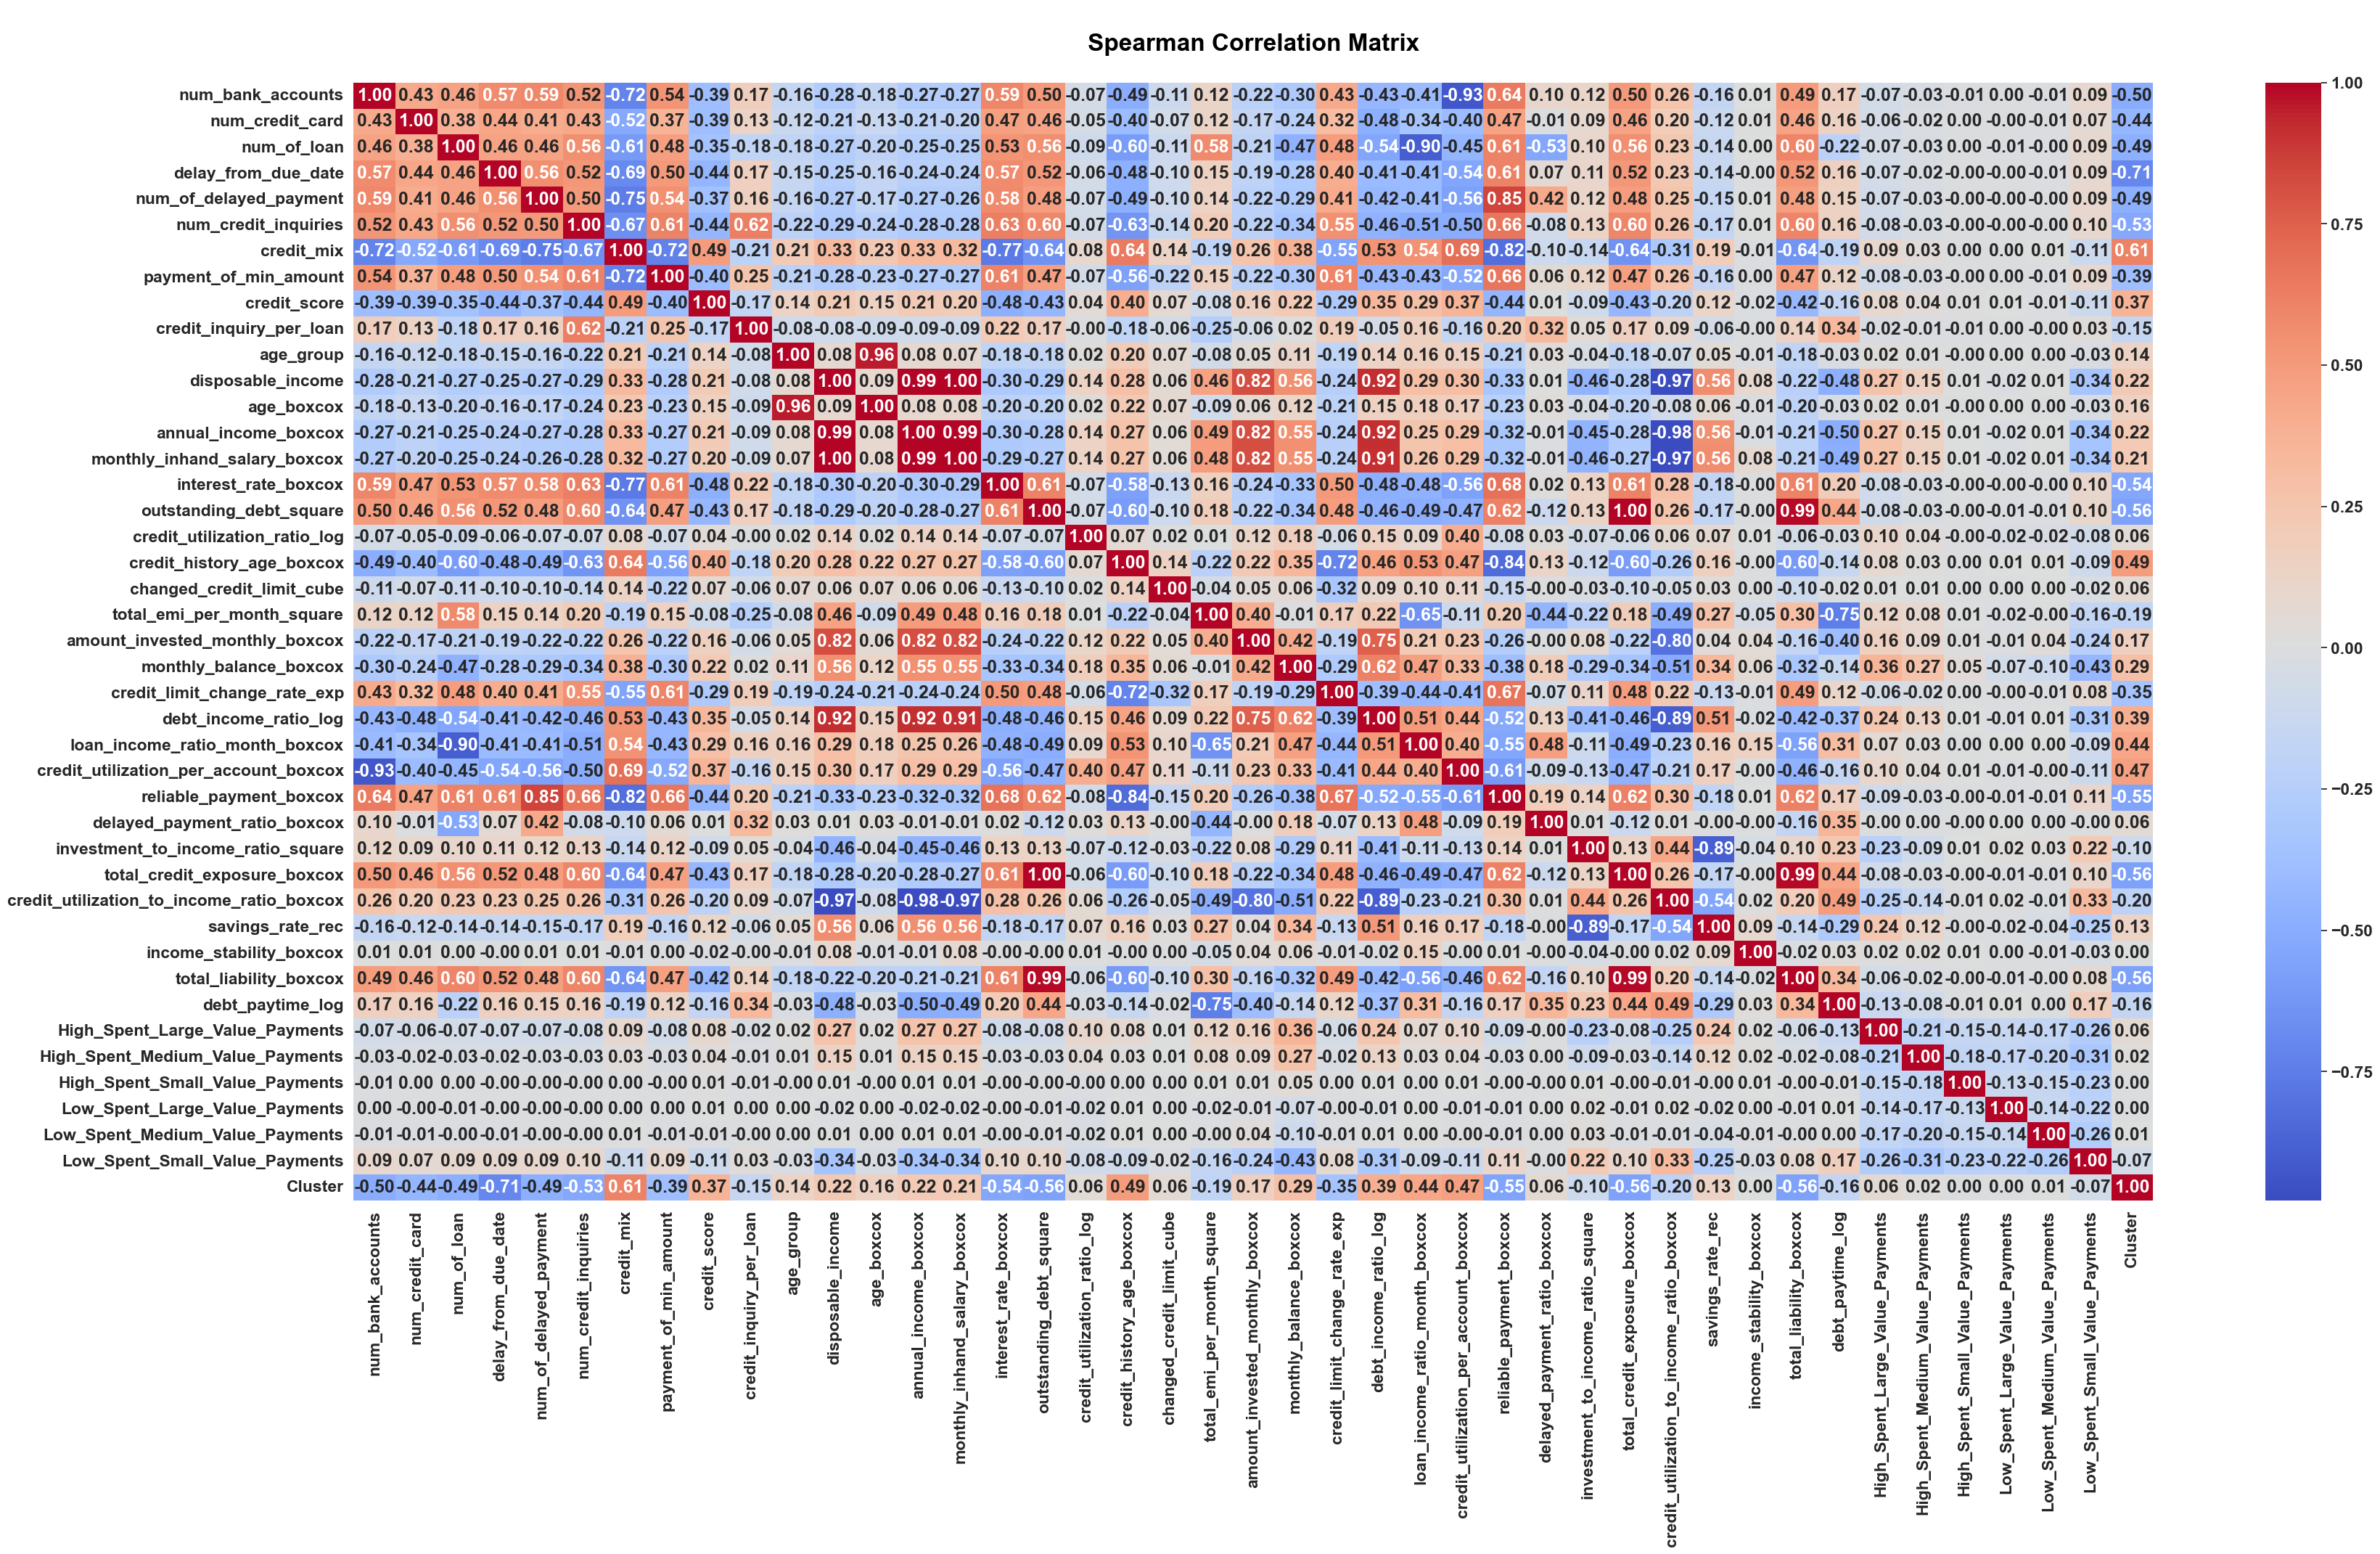

In [22]:
plt.figure(figsize=(40,20))
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

cor_col = df
correlation_matrix = cor_col.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('\nSpearman Correlation Matrix\n',fontdict={'fontsize':24,'color':'black','fontweight':'bold'})

plt.show()

## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [23]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    

    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)

In [24]:
new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','credit_mix','outstanding_debt_square','credit_history_age_boxcox','total_liability_boxcox','credit_history_age_boxcox',
           ]


Accuracy Test  - 0.8174666666666667
Accuracy Train - 0.9994674440115481

SyntaxError: invalid syntax (3881836495.py, line 6)

Accuracy Test  - 0.8174666666666667
Accuracy Train - 0.9994674440115481

Precision Test  - 0.8183876468405021
Precision Train - 0.9994676420249069

Recall Test  - 0.8174666666666667
Recall Train - 0.9994674440115481

F1_score Test  - 0.8176368289026008
F1_score Train - 0.9994674296239726

Confusion Matrix Test  -- 
[[ 7331  1442    32]
 [ 1795 12874  1204]
 [   11   992  4319]]
Confusion Matrix Train -- 
[[35701     0     0]
 [   34 34829     3]
 [    0    20 36444]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      8805
           1       0.84      0.81      0.83     15873
           2       0.78      0.81      0.79      5322

    accuracy                           0.82     30000
   macro avg       0.81      0.82      0.81     30000
weighted avg       0.82      0.82      0.82     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00   

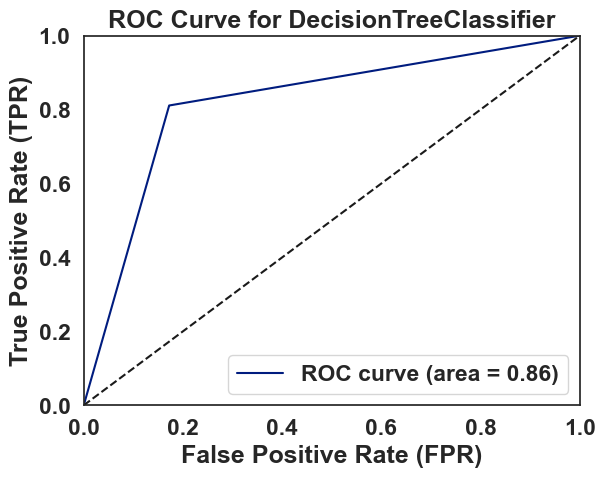

----------------------------------------


In [25]:
new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','credit_mix','outstanding_debt_square','credit_history_age_boxcox','total_liability_boxcox','credit_history_age_boxcox',
           
        ]


DT_Classifier = DecisionTreeClassifier(random_state=33)
evaluate_model(DT_Classifier, x_train[new], y_train, x_test[new], y_test)

                         Feature  Importance
6                     credit_mix      0.1981
7        outstanding_debt_square      0.1928
10     credit_history_age_boxcox      0.1120
8      credit_history_age_boxcox      0.1096
4           interest_rate_boxcox      0.1049
9         total_liability_boxcox      0.0685
1   monthly_inhand_salary_boxcox      0.0615
0           annual_income_boxcox      0.0546
3                num_credit_card      0.0392
2              num_bank_accounts      0.0357
5                    num_of_loan      0.0231


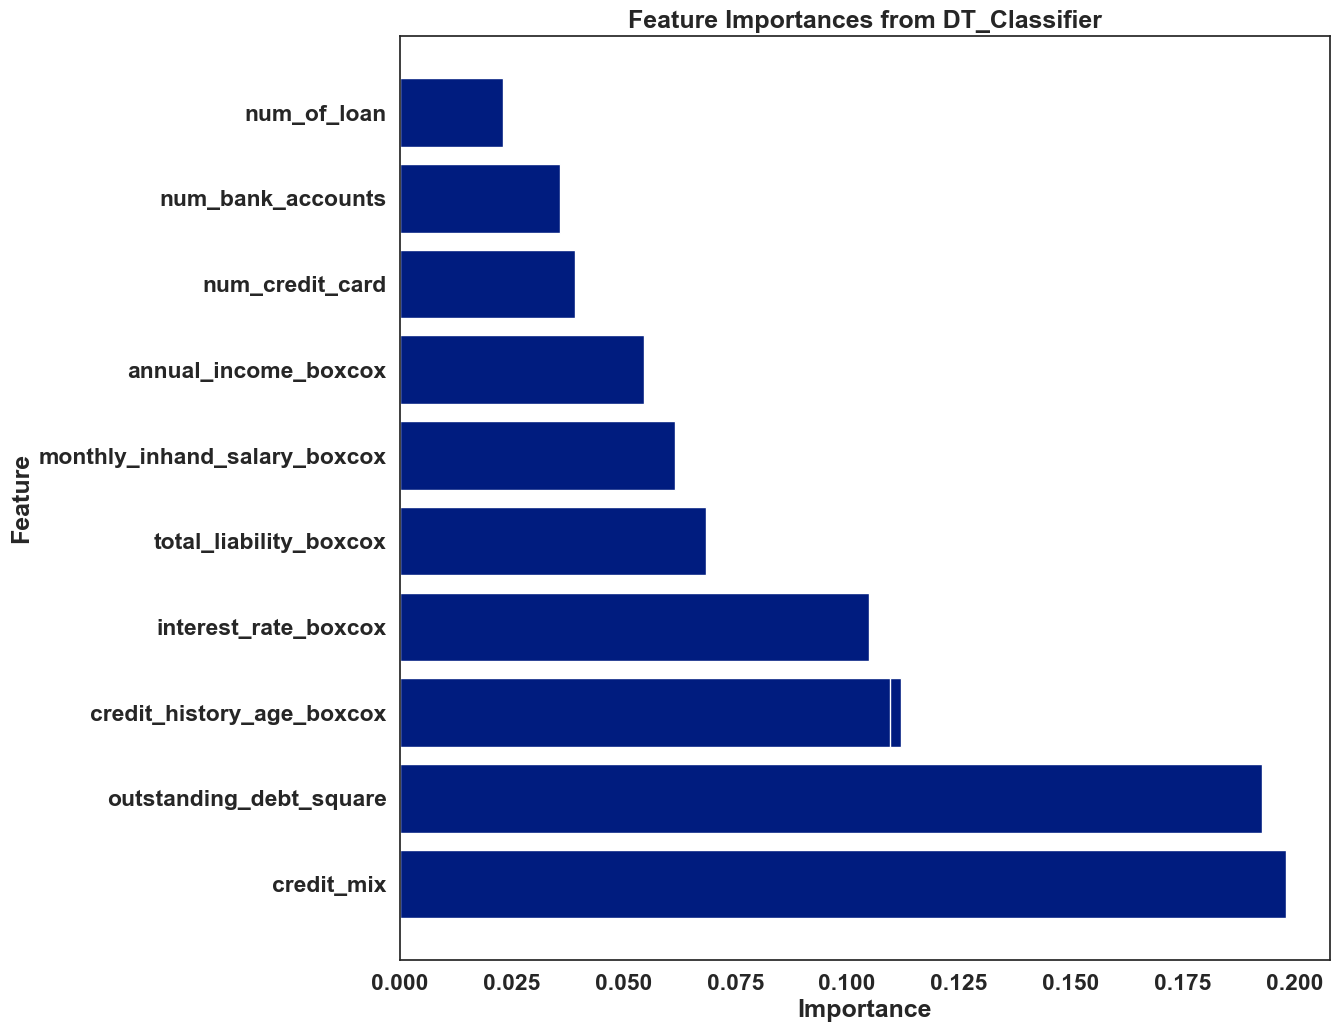

In [106]:
feature_importances = DT_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DT_Classifier')
plt.show()

Accuracy Test  - 0.8272
Accuracy Train - 0.9993833562238977

Precision Test  - 0.828238967211158
Precision Train - 0.9993836070476162

Recall Test  - 0.8272
Recall Train - 0.9993833562238977

F1_score Test  - 0.8273415459747154
F1_score Train - 0.9993832503932452

Confusion Matrix Test  -- 
[[ 7467  1326    12]
 [ 1747 12967  1159]
 [    1   939  4382]]
Confusion Matrix Train -- 
[[35695     6     0]
 [   34 34809    23]
 [    0     3 36461]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      8805
           1       0.85      0.82      0.83     15873
           2       0.79      0.82      0.81      5322

    accuracy                           0.83     30000
   macro avg       0.82      0.83      0.82     30000
weighted avg       0.83      0.83      0.83     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35701
       

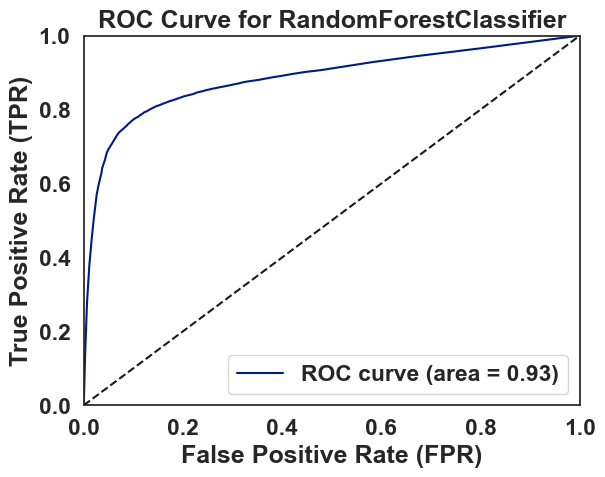

----------------------------------------


In [107]:
RF_Classifier = RandomForestClassifier(random_state=33)
evaluate_model(RF_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

                         Feature  Importance
7        outstanding_debt_square      0.1501
4           interest_rate_boxcox      0.1306
8      credit_history_age_boxcox      0.1255
10     credit_history_age_boxcox      0.1196
6                     credit_mix      0.1064
9         total_liability_boxcox      0.1000
1   monthly_inhand_salary_boxcox      0.0672
0           annual_income_boxcox      0.0657
2              num_bank_accounts      0.0523
3                num_credit_card      0.0494
5                    num_of_loan      0.0332


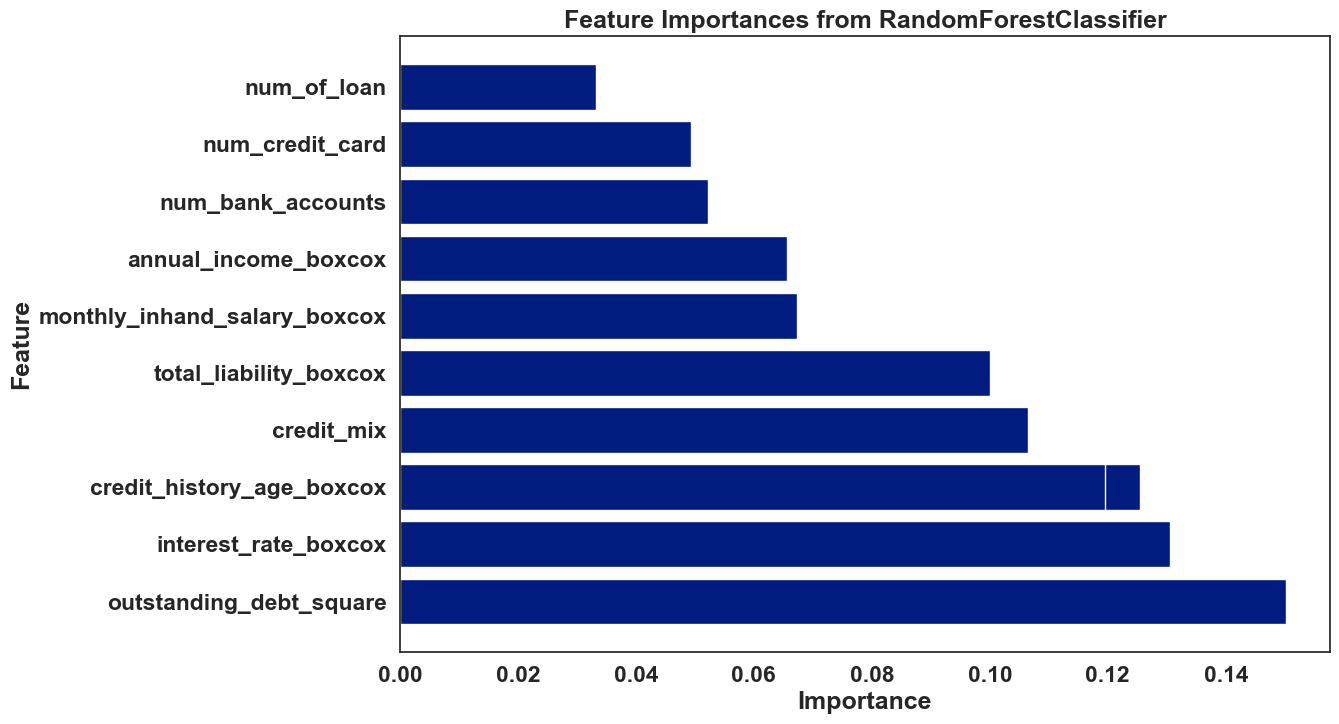

In [108]:
feature_importances = RF_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()


Accuracy Test  - 0.6736333333333333
Accuracy Train - 0.7398884435350506

Precision Test  - 0.7228405826634725
Precision Train - 0.7412392376127968

Recall Test  - 0.6736333333333333
Recall Train - 0.7398884435350506

F1_score Test  - 0.6780396447631433
F1_score Train - 0.7371645683561154

Confusion Matrix Test  -- 
[[6439  987 1379]
 [3405 9339 3129]
 [ 118  773 4431]]
Confusion Matrix Train -- 
[[26705  3391  5605]
 [ 6693 21560  6613]
 [  791  4747 30926]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      8805
           1       0.84      0.59      0.69     15873
           2       0.50      0.83      0.62      5322

    accuracy                           0.67     30000
   macro avg       0.66      0.72      0.67     30000
weighted avg       0.72      0.67      0.68     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.78      0.75      0.76  

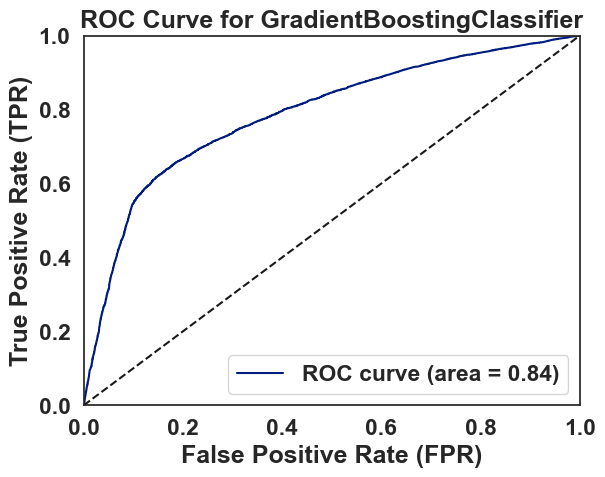

----------------------------------------


In [109]:
GB_Classifier = GradientBoostingClassifier(random_state=33)
evaluate_model(GB_Classifier, x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [30]:
xgb_Classifier = xg.XGBClassifier(random_state=22)
evaluate_model(xgb_Classifier, x_train[new], y_train, x_test[new], y_test)

AttributeError: 'DataFrame' object has no attribute 'dtype'

                                      Feature  Importance
31                                 credit_mix      0.2970
5                     outstanding_debt_square      0.1175
6                credit_utilization_ratio_log      0.0517
4                        interest_rate_boxcox      0.0472
32                      payment_of_min_amount      0.0457
22                     total_liability_boxcox      0.0370
26                            num_credit_card      0.0356
36                    credit_inquiry_per_loan      0.0353
25                          num_bank_accounts      0.0291
18               total_credit_exposure_boxcox      0.0284
35                                    Cluster      0.0262
30                     num_of_delayed_payment      0.0175
28                        delay_from_due_date      0.0147
29                       num_credit_inquiries      0.0147
33                          payment_behaviour      0.0142
11               credit_limit_change_rate_exp      0.0137
13            

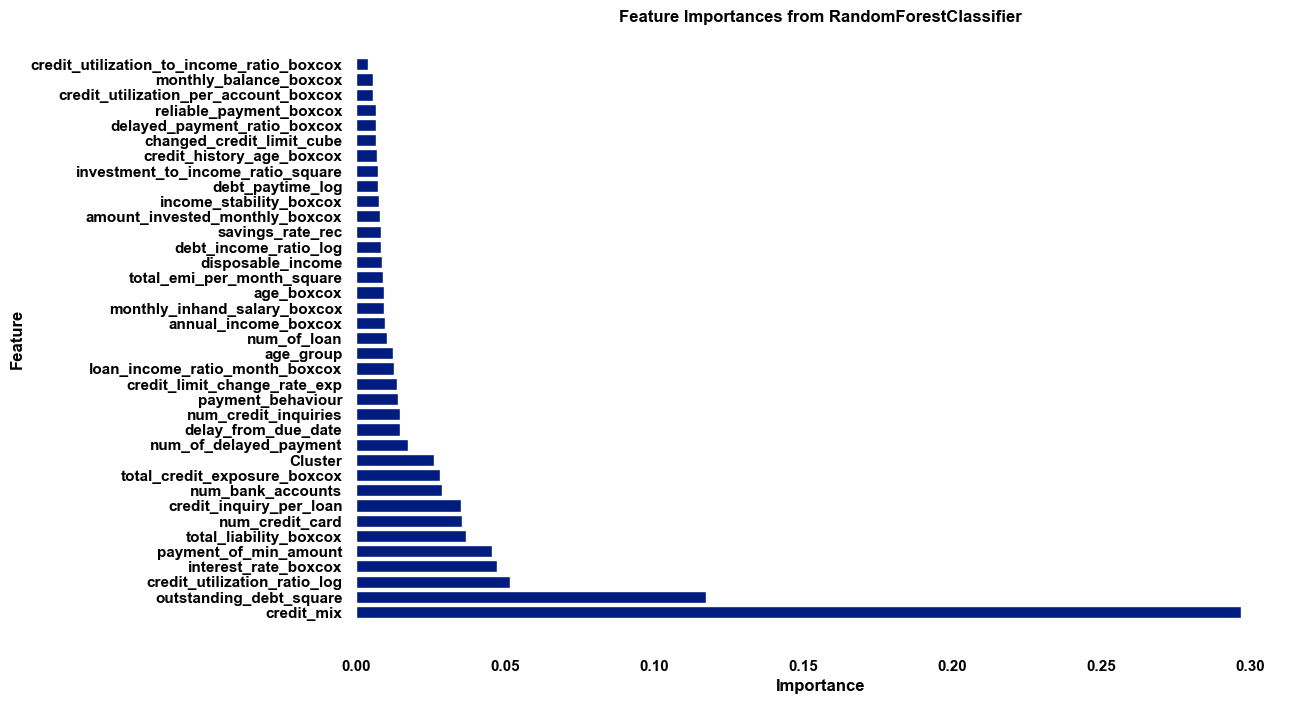

In [ ]:
# Get feature importances
feature_importances = xgb_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.8261
Accuracy Train - 0.9994674440115481

Precision Test  - 0.8267910127203217
Precision Train - 0.9994676420249069

Recall Test  - 0.8261
Recall Train - 0.9994674440115481

F1_score Test  - 0.826223766180484
F1_score Train - 0.9994674296239726

Confusion Matrix Test  -- 
[[ 7400  1393    12]
 [ 1720 13027  1126]
 [    4   962  4356]]
Confusion Matrix Train -- 
[[35701     0     0]
 [   34 34829     3]
 [    0    20 36444]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      8805
           1       0.85      0.82      0.83     15873
           2       0.79      0.82      0.81      5322

    accuracy                           0.83     30000
   macro avg       0.82      0.83      0.82     30000
weighted avg       0.83      0.83      0.83     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35701
       

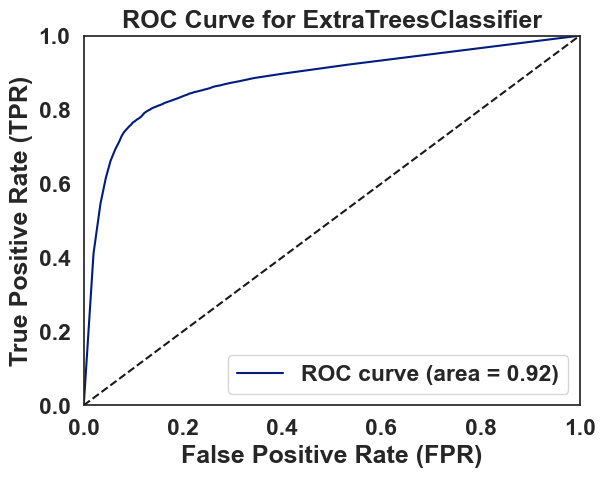

----------------------------------------


In [115]:
ET_Classifier =ExtraTreesClassifier(random_state=33)
evaluate_model(ET_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

                         Feature  Importance
6                     credit_mix      0.1574
10     credit_history_age_boxcox      0.1288
8      credit_history_age_boxcox      0.1277
4           interest_rate_boxcox      0.1140
7        outstanding_debt_square      0.0868
9         total_liability_boxcox      0.0860
3                num_credit_card      0.0664
2              num_bank_accounts      0.0629
1   monthly_inhand_salary_boxcox      0.0591
0           annual_income_boxcox      0.0574
5                    num_of_loan      0.0535


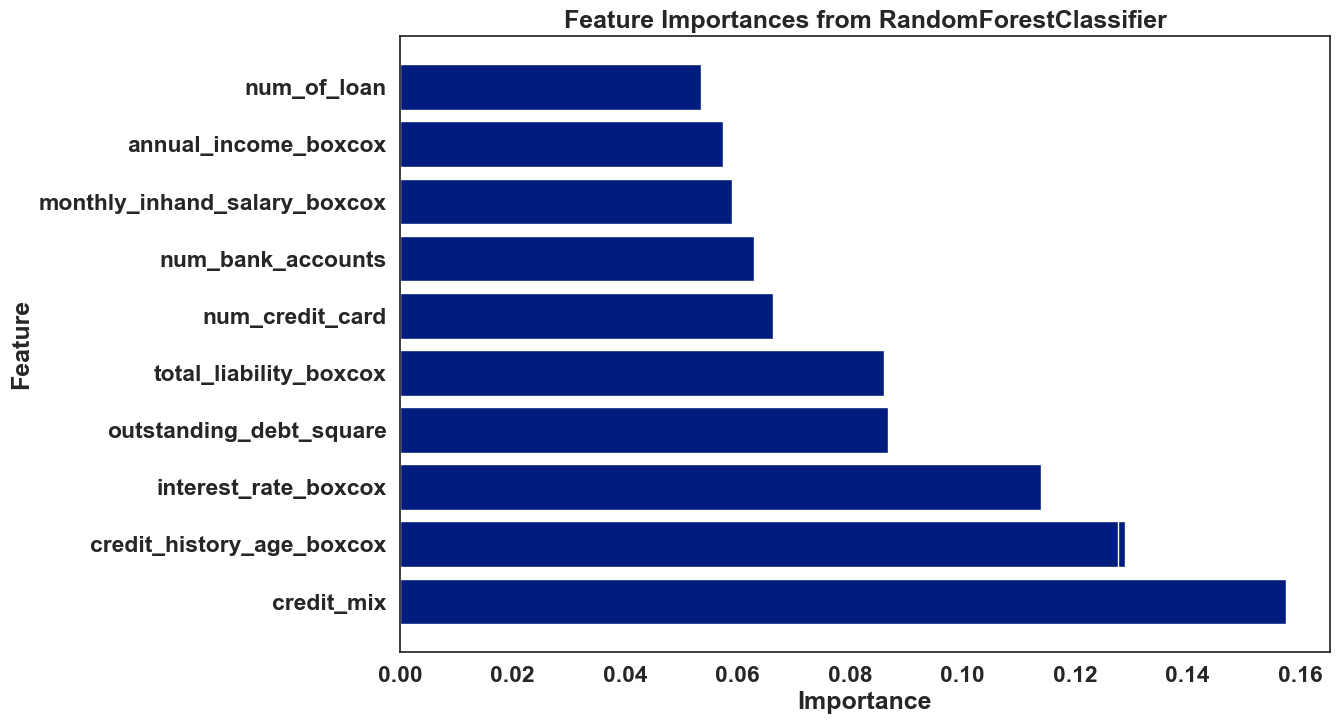

In [116]:
# Get feature importances
feature_importances = ET_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.646
Accuracy Train - 0.6963310715585712

Precision Test  - 0.6918951853930027
Precision Train - 0.6956021906685568

Recall Test  - 0.646
Recall Train - 0.6963310715585712

F1_score Test  - 0.6494025369924875
F1_score Train - 0.6941559753295288

Confusion Matrix Test  -- 
[[5977 1404 1424]
 [3729 8983 3161]
 [ 157  745 4420]]
Confusion Matrix Train -- 
[[24521  5634  5561]
 [ 7570 20624  6728]
 [  954  6089 29462]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      8805
           1       0.81      0.57      0.67     15873
           2       0.49      0.83      0.62      5322

    accuracy                           0.65     30000
   macro avg       0.63      0.69      0.64     30000
weighted avg       0.69      0.65      0.65     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     35716
           1     

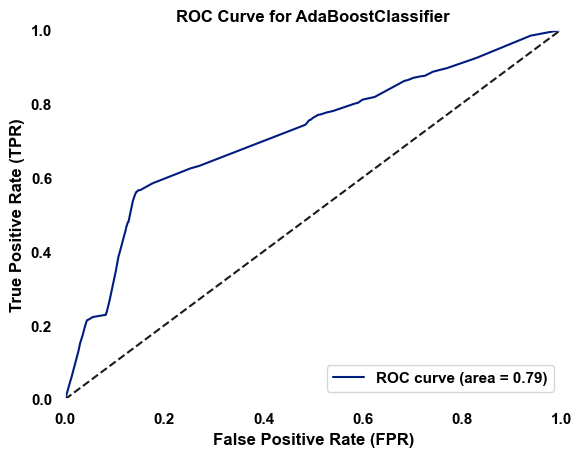

----------------------------------------


In [106]:
ADA_Classifier =AdaBoostClassifier(algorithm='SAMME',random_state=42,)
evaluate_model(ADA_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)


                           Feature  Importance
0                       credit_mix      0.3020
1                  num_credit_card      0.2368
2          outstanding_debt_square      0.1150
3   loan_income_ratio_month_boxcox      0.0671
4             interest_rate_boxcox      0.0635
8     total_credit_exposure_boxcox      0.0553
6                payment_behaviour      0.0428
5            payment_of_min_amount      0.0414
9              delay_from_due_date      0.0300
10         credit_inquiry_per_loan      0.0236
7     credit_limit_change_rate_exp      0.0225


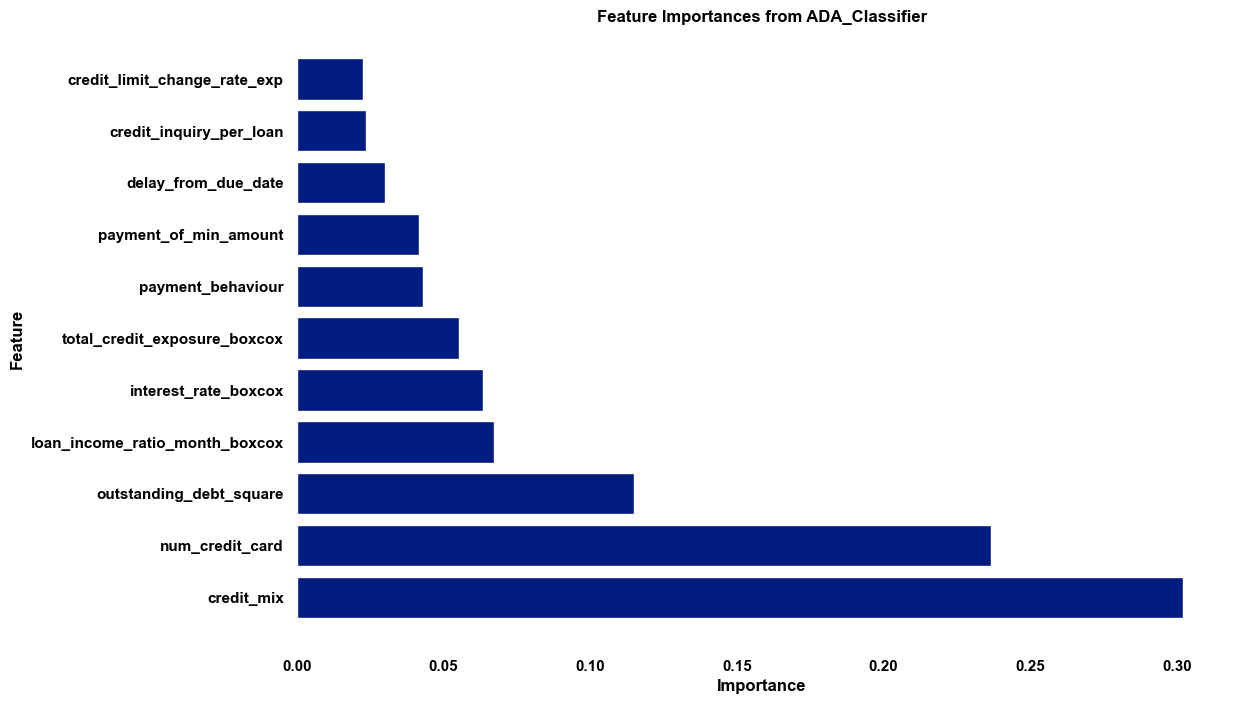

In [54]:
# Get feature importances
feature_importances = ADA_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df[ADA_fea].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ADA_Classifier')
plt.show()

In [74]:
params = {'n_neighbors' : [2,3,4,5,6,7]}

KNN_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')

KNN_grid_model.fit(x_train_scaled_df[new],y_train)




Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................n_neighbors=2;, score=0.833 total time=   3.0s
[CV 2/3] END .....................n_neighbors=2;, score=0.838 total time=   2.2s
[CV 3/3] END .....................n_neighbors=2;, score=0.824 total time=   2.1s
[CV 1/3] END .....................n_neighbors=3;, score=0.839 total time=   2.2s
[CV 2/3] END .....................n_neighbors=3;, score=0.836 total time=   2.2s
[CV 3/3] END .....................n_neighbors=3;, score=0.826 total time=   2.1s
[CV 1/3] END .....................n_neighbors=4;, score=0.822 total time=   2.1s
[CV 2/3] END .....................n_neighbors=4;, score=0.823 total time=   2.0s
[CV 3/3] END .....................n_neighbors=4;, score=0.811 total time=   2.1s
[CV 1/3] END .....................n_neighbors=5;, score=0.814 total time=   2.2s
[CV 2/3] END .....................n_neighbors=5;, score=0.813 total time=   2.1s
[CV 3/3] END .....................n_neighbors=5;,

GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1, param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=3)

In [75]:
KNN_grid_model.best_params_

{'n_neighbors': 3}

Accuracy Test  - 0.8105
Accuracy Train - 0.930337939475479

Precision Test  - 0.8148566728752914
Precision Train - 0.9302874135105575

Recall Test  - 0.8105
Recall Train - 0.930337939475479

F1_score Test  - 0.8107105946179749
F1_score Train - 0.9301304465865875

Confusion Matrix Test  -- 
[[ 7595  1181    29]
 [ 2063 12325  1485]
 [   37   890  4395]]
Confusion Matrix Train -- 
[[33919  1260   522]
 [ 2180 31005  1681]
 [  572  1241 34651]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      8805
           1       0.86      0.78      0.81     15873
           2       0.74      0.83      0.78      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.82      0.81     30000
weighted avg       0.81      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     35701
        

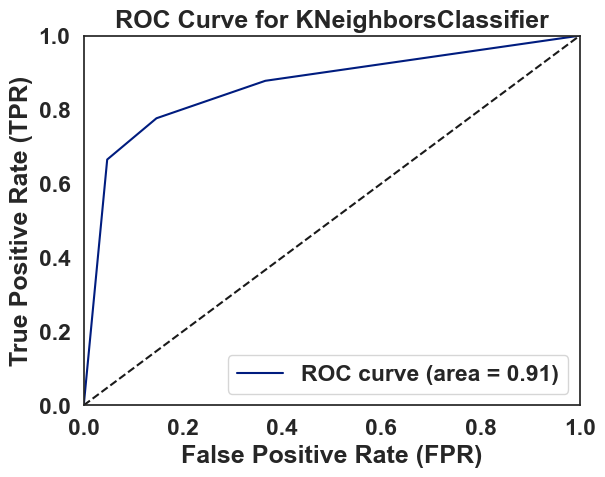

----------------------------------------


In [76]:
KN_Classifier = KNeighborsClassifier(n_neighbors=3)
evaluate_model(KN_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [81]:
RF_Classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' :[1,3,6,9],
    'max_leaf_nodes' :[2,6,12,24]

}
kf=KFold(n_splits=3,shuffle=True,random_state=42)

scorer = make_scorer(f1_score, pos_label='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)


grid_search = GridSearchCV( estimator= RF_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer)
grid_search.fit( x_train_scaled_df[imp_fea], y_train,)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\santhosh\Banking_Analytics\Banking_Analytics\banking\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 20, 'max_leaf_nodes': 24, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
np.unique(y_train)

array([0, 1, 2], dtype=int8)

In [45]:
ET_Classifier =ExtraTreesClassifier(random_state=42,)

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [4, 10],
}

scorer = make_scorer(f1_score, average='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)

ET_grid_search = GridSearchCV( estimator= ET_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer,return_train_score=True)
ET_grid_search.fit( x_train_scaled_df[ET_revised], y_train,)
best_params = ET_grid_search.best_params_
print(best_params)
ET_best = ExtraTreesClassifier(**best_params, random_state=42)
evaluate_model(ET_best, x_train_scaled_df[ET_revised], y_train, x_test_scaled_df[ET_revised], y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Accuracy Test  - 0.8000333333333334
Accuracy Train - 0.8996552400706337

Precision Test  - 0.8084256513849961
Precision Train - 0.8992894793734336

Recall Test  - 0.8000333333333334
Recall Train - 0.8996552400706337

F1_score Test  - 0.8005285651492012
F1_score Train - 0.8989014942883302

Confusion Matrix Test  -- 
[[ 7584  1051   170]
 [ 2223 11963  1687]
 [   30   838  4454]]
Confusion Matrix Train -- 
[[33114  1818   769]
 [ 3339 28774  2753]
 [  288  1773 34403]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      8805
           1       0.86      0.75      0.80     15873
           2       0.71      0.84      0.77      5322

    accuracy                           0.80     30000
   macro avg       0.78      0.82      0.79     30000
weighted avg       0.81      0.80      0.80     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.90      0.93   

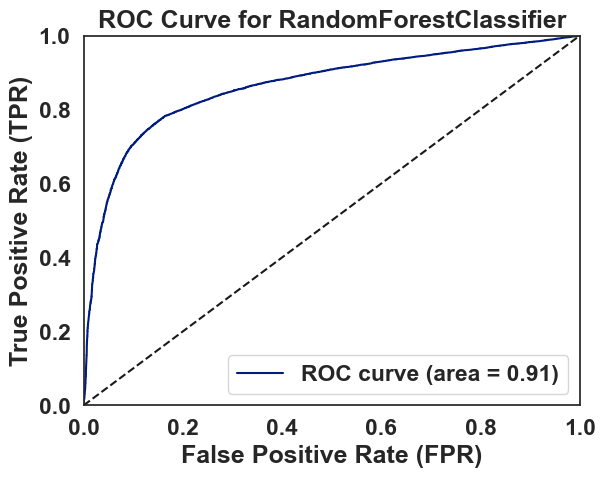

----------------------------------------


In [126]:
# min_samples_leaf=6
RF_Classifier = RandomForestClassifier(n_estimators=10,random_state=33,min_samples_leaf=6,n_jobs=-1,class_weight='balanced',ccp_alpha=0.00001,
                                       )
evaluate_model(RF_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

Accuracy Test  - 0.8013
Accuracy Train - 0.8952826751128178

Precision Test  - 0.8119517928519973
Precision Train - 0.8949471432724677

Recall Test  - 0.8013
Recall Train - 0.8952826751128178

F1_score Test  - 0.8016693632363991
F1_score Train - 0.8944077824240285

Confusion Matrix Test  -- 
[[ 7667   979   159]
 [ 2290 11820  1763]
 [   28   742  4552]]
Confusion Matrix Train -- 
[[33055  1808   838]
 [ 3494 28439  2933]
 [  301  1834 34329]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      8805
           1       0.87      0.74      0.80     15873
           2       0.70      0.86      0.77      5322

    accuracy                           0.80     30000
   macro avg       0.78      0.82      0.80     30000
weighted avg       0.81      0.80      0.80     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     35701
      

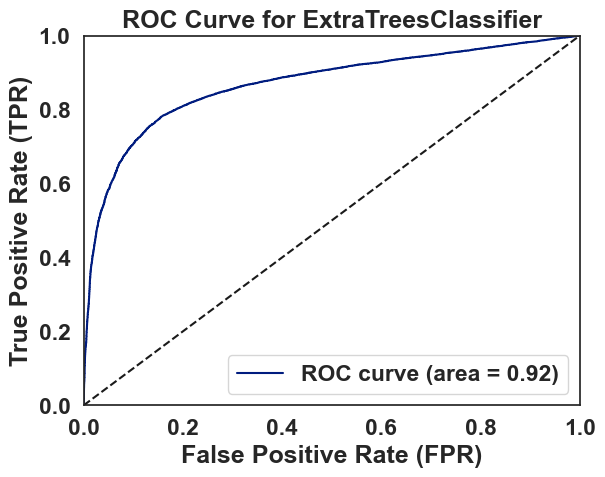

----------------------------------------


{'max_depth': 10,
 'max_leaf_nodes': 32,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [199]:
ET_Classifier =ExtraTreesClassifier(n_estimators=50,random_state=33,min_samples_leaf=5,n_jobs=-1,max_depth=25,class_weight='balanced')
evaluate_model(ET_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    
    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        # Binarize the output
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
        y_proba = model.predict_proba(x_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure()
        for i in range(3):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('ROC Curve for {0}'.format(type(model).__name__))
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)


In [27]:
params = {
   # 'gamma': [0, 0.3, 0.5],
    'learning_rate': [0.4, 0.1,0.2,0.3],
    'max_depth': [ 5, 7,10],
    'min_child_weight': [3, 5, 1],
}


Accuracy Test  - 0.8174666666666667
Accuracy Train - 0.9994674440115481

Precision Test  - 0.8183876468405021
Precision Train - 0.9994676420249069

Recall Test  - 0.8174666666666667
Recall Train - 0.9994674440115481

F1_score Test  - 0.8176368289026008
F1_score Train - 0.9994674296239726

Confusion Matrix Test  -- 
[[ 7331  1442    32]
 [ 1795 12874  1204]
 [   11   992  4319]]
Confusion Matrix Train -- 
[[35701     0     0]
 [   34 34829     3]
 [    0    20 36444]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      8805
           1       0.84      0.81      0.83     15873
           2       0.78      0.81      0.79      5322

    accuracy                           0.82     30000
   macro avg       0.81      0.82      0.81     30000
weighted avg       0.82      0.82      0.82     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00   

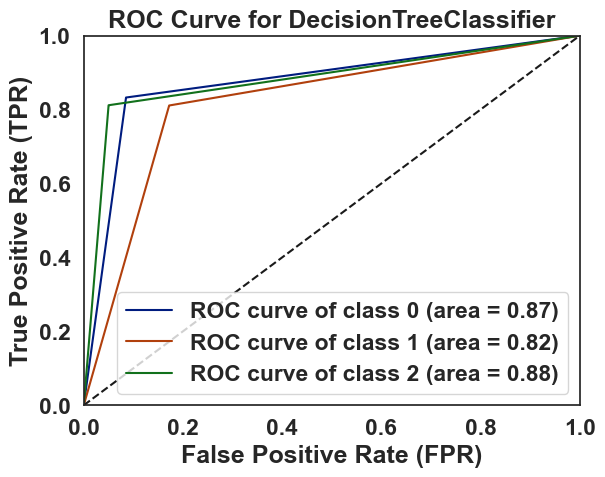

----------------------------------------


In [36]:
DT_Classifier = DecisionTreeClassifier(random_state=33,)
evaluate_model(DT_Classifier, x_train[new], y_train, x_test[new], y_test)

In [37]:
from sklearn import tree

tree.plot_tree(DT_Classifier)

[Text(0.4777106003842055, 0.9880952380952381, 'x[6] <= 1.5\ngini = 0.667\nsamples = 107031\nvalue = [35701, 34866, 36464]'),
 Text(0.19005646078191493, 0.9642857142857143, 'x[7] <= 35.588\ngini = 0.59\nsamples = 65192\nvalue = [30070, 28124, 6998]'),
 Text(0.3338835305830602, 0.9761904761904763, 'True  '),
 Text(0.024235049893709948, 0.9404761904761905, 'x[2] <= 2.5\ngini = 0.471\nsamples = 24893\nvalue = [2348, 17119, 5426]'),
 Text(0.00248756087842755, 0.9166666666666666, 'x[8] <= 79.247\ngini = 0.362\nsamples = 659\nvalue = [124.0, 24.0, 511.0]'),
 Text(0.0024201212464477293, 0.8928571428571429, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.002555000510407371, 0.8928571428571429, 'x[4] <= 6.511\ngini = 0.347\nsamples = 651\nvalue = [124, 16, 511]'),
 Text(0.00248756087842755, 0.8690476190476191, 'x[3] <= 3.5\ngini = 0.331\nsamples = 643\nvalue = [124.0, 8.0, 511.0]'),
 Text(0.0005100122168473948, 0.8452380952380952, 'x[8] <= 120.864\ngini = 0.159\nsamples = 230\nvalue = [20

In [ ]:
dtree = DecisionTreeClassifier(
    criterion='gini',         
    splitter='best',          
    max_depth=10,             
    min_samples_split=20,     
    min_samples_leaf=5,       
    min_weight_fraction_leaf=0, 
    max_features='sqrt',       
    random_state=42,           
    max_leaf_nodes=50,         
    min_impurity_decrease=0.01,
    class_weight=None,         
    presort='deprecated',      
    ccp_alpha=0.0              
)

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, loguniform

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[new])
x_test_scaled = scaler.transform(x_test[new])

# Define the parameter space
param_distributions = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e0),
    'kernel': ['rbf', 'poly']
}

# Create base SVM classifier
svm_clf = SVC(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm_clf, 
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(x_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best estimator for final evaluation
best_svm = random_search.best_estimator_
evaluate_model(best_svm, x_train_scaled, y_train, x_test_scaled, y_test)

NameError: name 'x_train' is not defined

In [41]:
from sklearn.feature_selection import RFE

ET_Classifier =ExtraTreesClassifier(random_state=42,)

selector=RFE(ET_Classifier,n_features_to_select=20, step=1)
selector=selector.fit(x_train_scaled_df,y_train)
selected_features_mask = selector.get_support()
selected_features = x_train_scaled_df.columns[selected_features_mask]
print(selected_features)


Index(['age_boxcox', 'interest_rate_boxcox', 'outstanding_debt_square',
       'credit_history_age_boxcox', 'credit_limit_change_rate_exp',
       'debt_income_ratio_log', 'loan_income_ratio_month_boxcox',
       'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox',
       'total_credit_exposure_boxcox',
       'credit_utilization_to_income_ratio_boxcox', 'total_liability_boxcox',
       'num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_credit_inquiries', 'num_of_delayed_payment',
       'credit_mix', 'payment_of_min_amount'],
      dtype='object')


In [39]:
xgb_Classifier =xg.XGBClassifier(random_state=42,)

selector=RFE(xgb_Classifier,n_features_to_select=20, step=1)
selector=selector.fit(x_train_scaled_df,y_train)
selected_features_mask = selector.get_support()
selected_features = x_train_scaled_df.columns[selected_features_mask]
print(selected_features)


Index(['monthly_inhand_salary_boxcox', 'interest_rate_boxcox',
       'outstanding_debt_square', 'credit_utilization_ratio_log',
       'credit_limit_change_rate_exp', 'loan_income_ratio_month_boxcox',
       'total_credit_exposure_boxcox', 'total_liability_boxcox',
       'num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_credit_inquiries', 'num_of_delayed_payment',
       'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'age_group',
       'Cluster', 'credit_inquiry_per_loan'],
      dtype='object')
